In [6]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
from skimage.filters import gaussian
from skimage.restoration import rolling_ball 
from skimage.morphology import disk
import matplotlib.pyplot as plt
from skimage.filters import difference_of_gaussians
from skimage.morphology import white_tophat

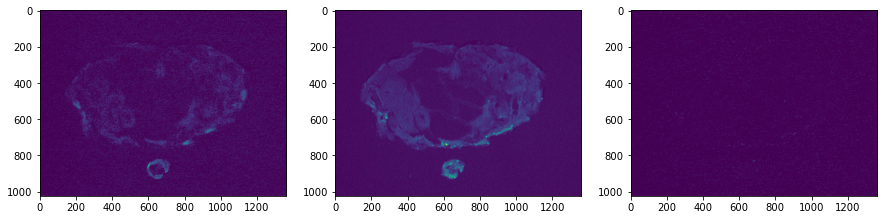

In [4]:
abdomen_raw = imread('/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/input_images/current/35A_2_FITC.tif')
fig, axs = plt.subplots(1, 3, figsize=(15,15))

axs[0].imshow(abdomen_raw[:,:,0])
axs[1].imshow(abdomen_raw[:,:,1])
axs[2].imshow(abdomen_raw[:,:,2])

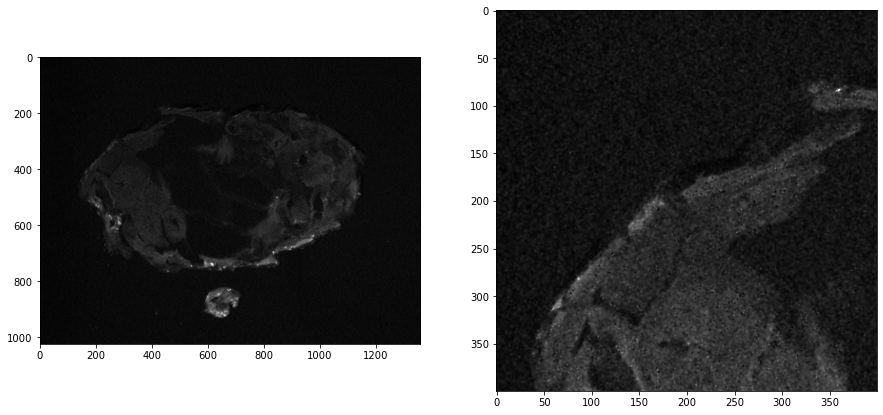

In [11]:
grayscale = rgb2gray(abdomen_raw)
grayscale_zoom = grayscale[100:500,100:500]

fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(grayscale,cmap=plt.cm.gray)
axs[1].imshow(grayscale_zoom,cmap=plt.cm.gray)

Text(0.5, 1.0, 'Top hat')

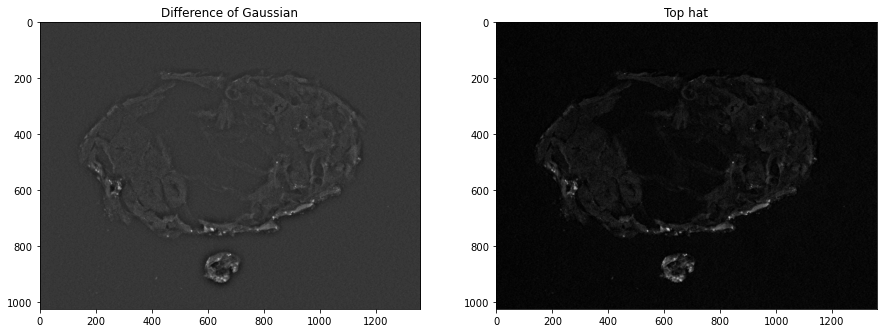

In [15]:
# DoG
dog = difference_of_gaussians(grayscale, 0, 15)

# Top-Hat
top_hat = white_tophat(grayscale, disk(15))

fig, axs = plt.subplots(1,2, figsize=(15,10))
axs[0].imshow(dog,cmap=plt.cm.gray)
axs[0].set_title("Difference of Gaussian")
axs[1].imshow(top_hat,cmap=plt.cm.gray)
axs[1].set_title("Top hat")



/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_11796/3812977373.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mean_filtered = filters.rank.mean(grayscale, disk(1))


Text(0.5, 1.0, 'Mean filtered TopHat 15')

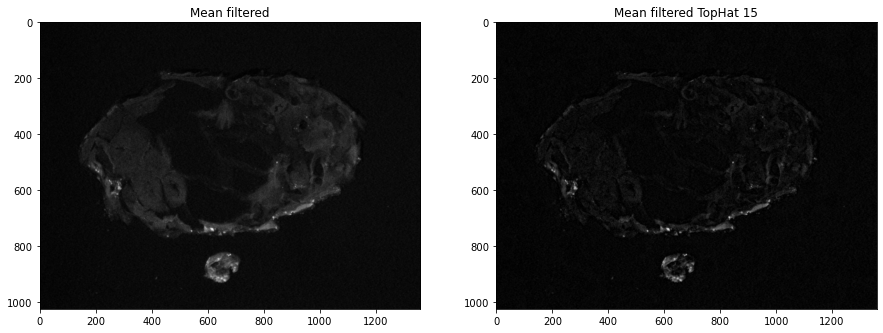

In [17]:
mean_filtered = filters.rank.mean(grayscale, disk(1))
mean_filtered_top_hat = white_tophat(mean_filtered, disk(15))

fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].imshow(mean_filtered,cmap=plt.cm.gray)
axs[0].set_title("Mean filtered")
axs[1].imshow(mean_filtered_top_hat,cmap=plt.cm.gray)
axs[1].set_title("Mean filtered TopHat 15")

Text(0.5, 1.0, 'Mean filtered TopHat 15')

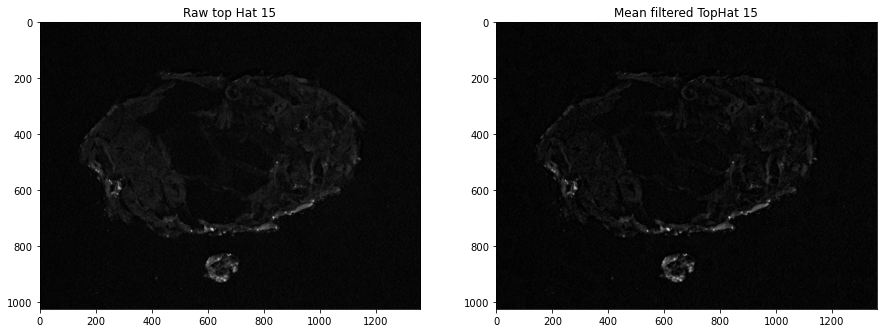

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].imshow(top_hat,cmap=plt.cm.gray)
axs[0].set_title("Raw top Hat 15")
axs[1].imshow(mean_filtered_top_hat,cmap=plt.cm.gray)
axs[1].set_title("Mean filtered TopHat 15")

In [21]:
mean_filtered_top_hat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

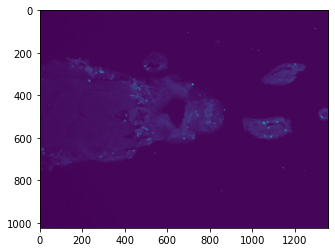

In [31]:
input_image = imread('/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/data/90F_3_FITC.tif')


green_channel = input_image[:,:,1]

#invert = np.invert(green_channel)
plt.imshow(green_channel)
plt.savefig('/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/green.tif',bbox_inches="tight", pad_inches=0.0,dpi=500)


In [ ]:
raw_image = imread(input_image)
green_channel = raw_image[:,:,1] ## Green channel
top_hat = white_tophat(raw_image,disk(15))

fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].imshow(raw_image)
axs[0].set_title("Raw Image")
axs[1].imshow(top_hat,cmap=plt.cm.green)
axs[1].set_title("TopHat 15")